In [ ]:
!pip install  matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Buku DM/dataset/Credit Card Customer Data.csv')
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [ ]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [ ]:
# Identify the duplicated customer keys
duplicate_keys = df.duplicated('Customer Key') == True

In [ ]:
# Drop duplicated keys

df = df[duplicate_keys == False]

In [ ]:
df.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

In [ ]:
df[df.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


In [ ]:
df=df[~df.duplicated()]

In [ ]:
df.shape

(644, 5)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


Avg_Credit_Limit
Skew : 2.19


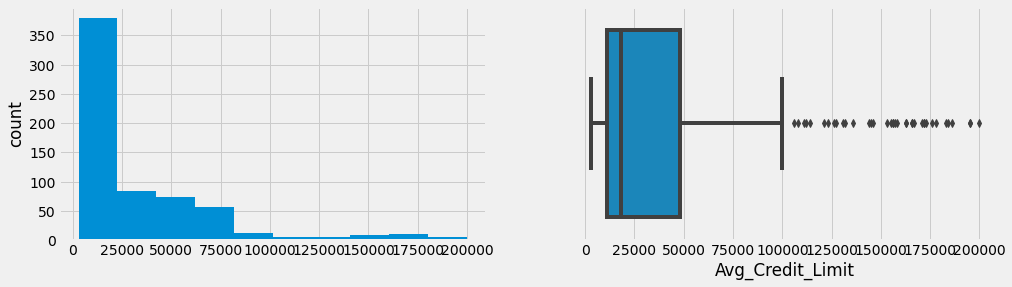

Total_Credit_Cards
Skew : 0.17


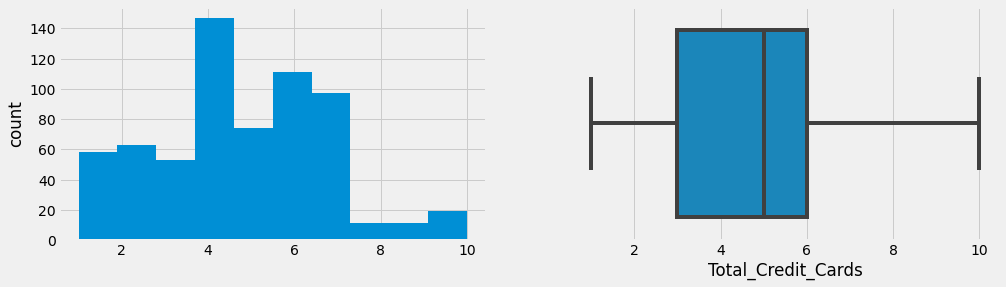

Total_visits_bank
Skew : 0.15


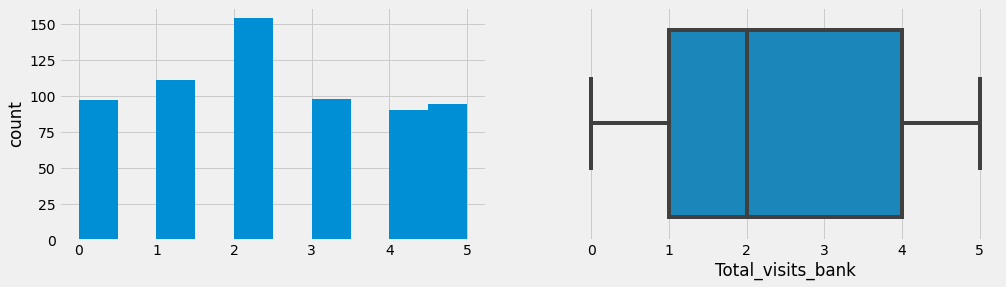

Total_visits_online
Skew : 2.21


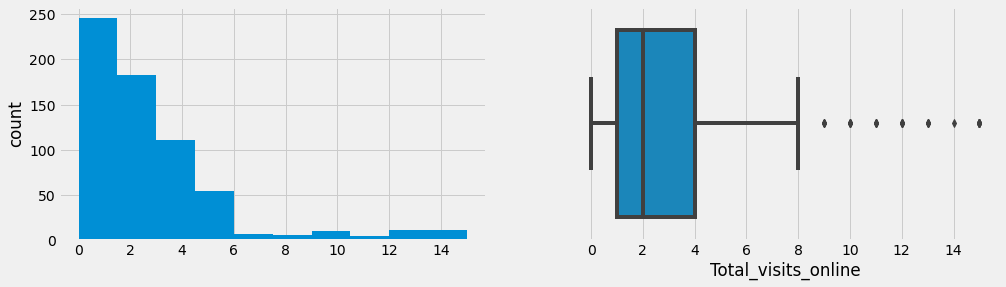

Total_calls_made
Skew : 0.65


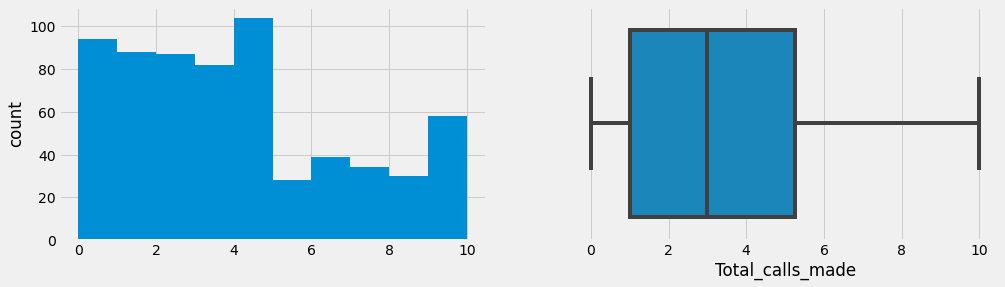

In [ ]:
for col in df.columns:
     print(col)
     print('Skew :',round(df[col].skew(),2))
     plt.figure(figsize=(15,4))
     plt.subplot(1,2,1)
     df[col].hist()
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x=df[col])
     plt.show()

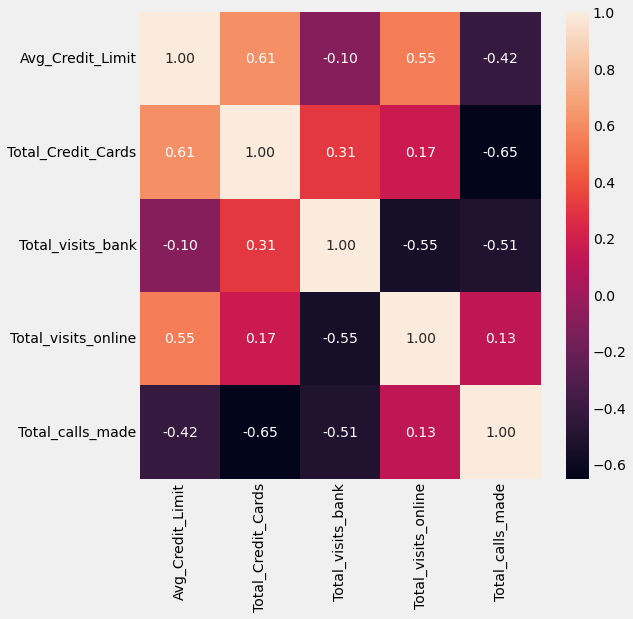

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.750192,-1.239437,-0.858684,-0.549573,-1.253982
1,0.413280,-0.779381,-1.473803,2.495669,1.873420
2,0.413280,1.060843,-0.858684,0.127148,0.135974
3,-0.121485,0.140731,-0.858684,-0.549573,0.135974
4,1.750192,0.600787,-1.473803,3.172390,-0.211515


In [ ]:
#Creating copy of the data to store labels from each algorithm
df_scaled_copy = df_scaled.copy(deep=True)

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


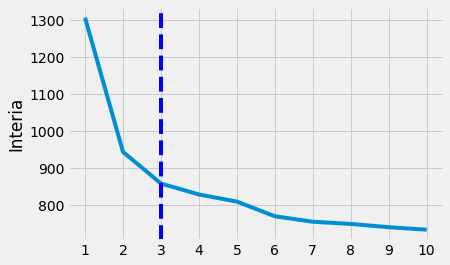

In [ ]:
from sklearn_extra.cluster import KMedoids
List = []
for k in range(1,11):#this range is optional
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state =10 ) 
    kmedoids.fit(df_scaled)
    List.append( kmedoids.inertia_)
    
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show() 

In [ ]:
from sklearn.metrics import silhouette_score

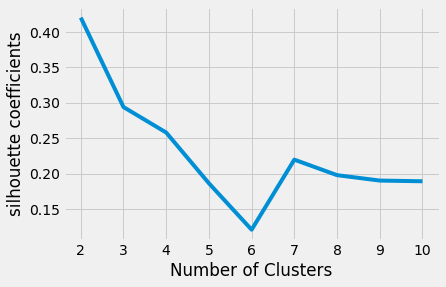

In [ ]:
from sklearn_extra.cluster import KMedoids
silhouette_coefficients = []
for k in range (2,11):
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state = 5) 
    kmedoids.fit(df_scaled)
    score = silhouette_score(df_scaled, kmedoids.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()

In [ ]:
max(silhouette_coefficients)

0.42029070754800796

In [ ]:
#Apply the K-Medoids algorithm
kmedo = KMedoids(n_clusters=3, max_iter=1000, random_state=1)

#Fit the kmedo function on the scaled data
kmedo.fit(df_scaled)

df_scaled_copy['kmedoLabels'] = kmedo.predict(df_scaled)
df['kmedoLabels'] = kmedo.predict(df_scaled)
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,kmedoLabels
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


In [ ]:
df.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

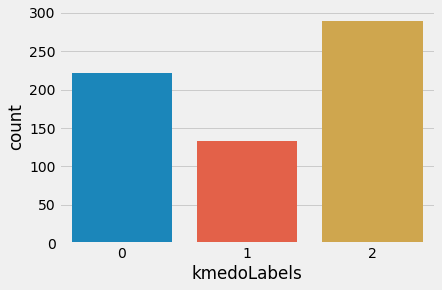

In [ ]:
# counting number of clusters
sns.countplot(x=df.kmedoLabels)
plt.show()

In [ ]:
#Calculating summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]

In [ ]:
#Calculating summary statistics of the original data for each label
mean = df.groupby('kmedoLabels').mean()
median = df.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0
